In [1]:
# Import 
import pandas as pd
import numpy as np

In [2]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [7]:
## Fit model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.8032786885245902

In [8]:
## Cross validateion

In [16]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(rf_clf,X_train,y_train,cv=10) # score() # mean accuracy

In [17]:
print(f'Mean of Our Model {cvs.mean()*100:.2f} %')
print(f'Standard Deviation {np.std(cvs)}')

Mean of Our Model 82.22 %
Standard Deviation 0.08757552296288171


In [20]:
y_predict = rf_clf.predict(X_test)
## Confusion Matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
confusion_matrix(y_test,y_predict)   # [[(0,0),(0,1)
                                     #  (1,0),(1,1)]]

array([[18,  6],
       [ 6, 31]], dtype=int64)

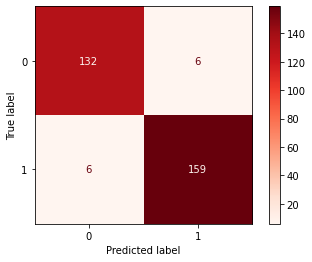

In [25]:
plot_confusion_matrix(rf_clf,X,y,cmap='Reds')

In [26]:
## ROC Curev
from sklearn.metrics import roc_curve

In [29]:
y_predict

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [30]:
y_pred_pro = rf_clf.predict_proba(X_test)

In [31]:
y_pred_pro[:5] # probaility of class class 0 class 1 < 1. 94 % 6% => 0  > 

array([[0.94, 0.06],
       [0.29, 0.71],
       [0.29, 0.71],
       [0.32, 0.68],
       [0.53, 0.47]])

In [40]:
y_pred_pro.shape

(61, 2)

In [49]:
positive_prob = y_pred_pro[:,1]
positive_prob

array([0.06, 0.71, 0.71, 0.68, 0.47, 0.92, 0.35, 0.94, 0.36, 0.11, 0.31,
       0.82, 0.84, 0.65, 0.82, 0.46, 0.93, 0.62, 0.01, 0.36, 0.99, 0.3 ,
       0.9 , 0.63, 0.25, 0.09, 0.78, 0.82, 0.89, 0.36, 0.03, 0.94, 0.57,
       0.73, 0.82, 0.97, 0.85, 0.5 , 0.96, 0.58, 0.04, 0.35, 0.2 , 0.25,
       0.81, 0.51, 0.92, 0.67, 0.09, 0.69, 0.37, 0.17, 0.54, 0.89, 0.03,
       1.  , 0.55, 0.13, 0.76, 0.94, 0.8 ])

In [50]:
fpr,tpr,thresholds = roc_curve(y_test,positive_prob)

In [53]:
import matplotlib.pyplot as plt

In [71]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='red',label='ROC Curve')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('Receiver Operating Characteristics Curve')

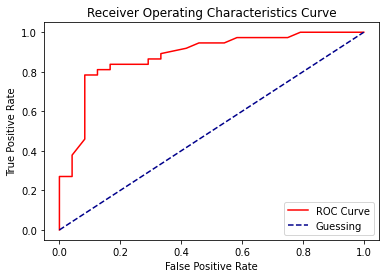

In [72]:
plot_roc_curve(fpr,tpr)

In [73]:
# Theory Curve
fpr,tpr,thresholds = roc_curve(y_test,y_test)

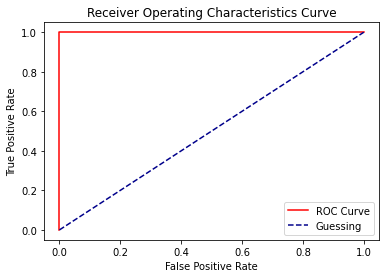

In [74]:
plot_roc_curve(fpr,tpr)

In [79]:
# Area under the Curve AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,positive_prob)
auc

0.8806306306306306

In [80]:
## Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        24
           1       0.84      0.84      0.84        37

    accuracy                           0.80        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



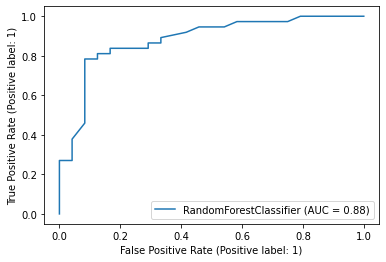

In [82]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_clf,X_test,y_test)

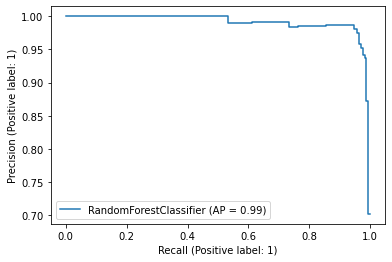

In [85]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(rf_clf,X,y)